# Bench Plotting
Given the output from the benchmarking pipeline, this notebook plots relevant figures given the path to the output CSVs. 


In [1]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid", palette="pastel", rc={"figure.dpi":300, 'savefig.dpi':300})

## Helper Methods

In [2]:
def csv2dataframe(csv_file):
    """
    Converts the csv file to a pandas dataframe.
    """
    return pandas.read_csv(csv_file)

---
---
## *A - Performance Testing*
---
---

### A.1 - parsing csv

In [52]:
performance_csv = "results/res_performance_benchmarking_O0.csv"

In [53]:
# open dataframe
df = csv2dataframe(performance_csv)
df["Build Memory (MB)"] = df[" build mem (bytes)"] / (10)**6
df["Build Time (seconds)"] = df[" build time (ns)"] / (10**9)
df["Query Memory (MB)"] = df[" query memory (bytes)"] / (10)**6
df["Query Time (seconds)"] = df[" query time (ns)"] / (10**9)

FileNotFoundError: [Errno 2] No such file or directory: 'results/res_performance_benchmarking_O0.csv'

### A.2 - plotting

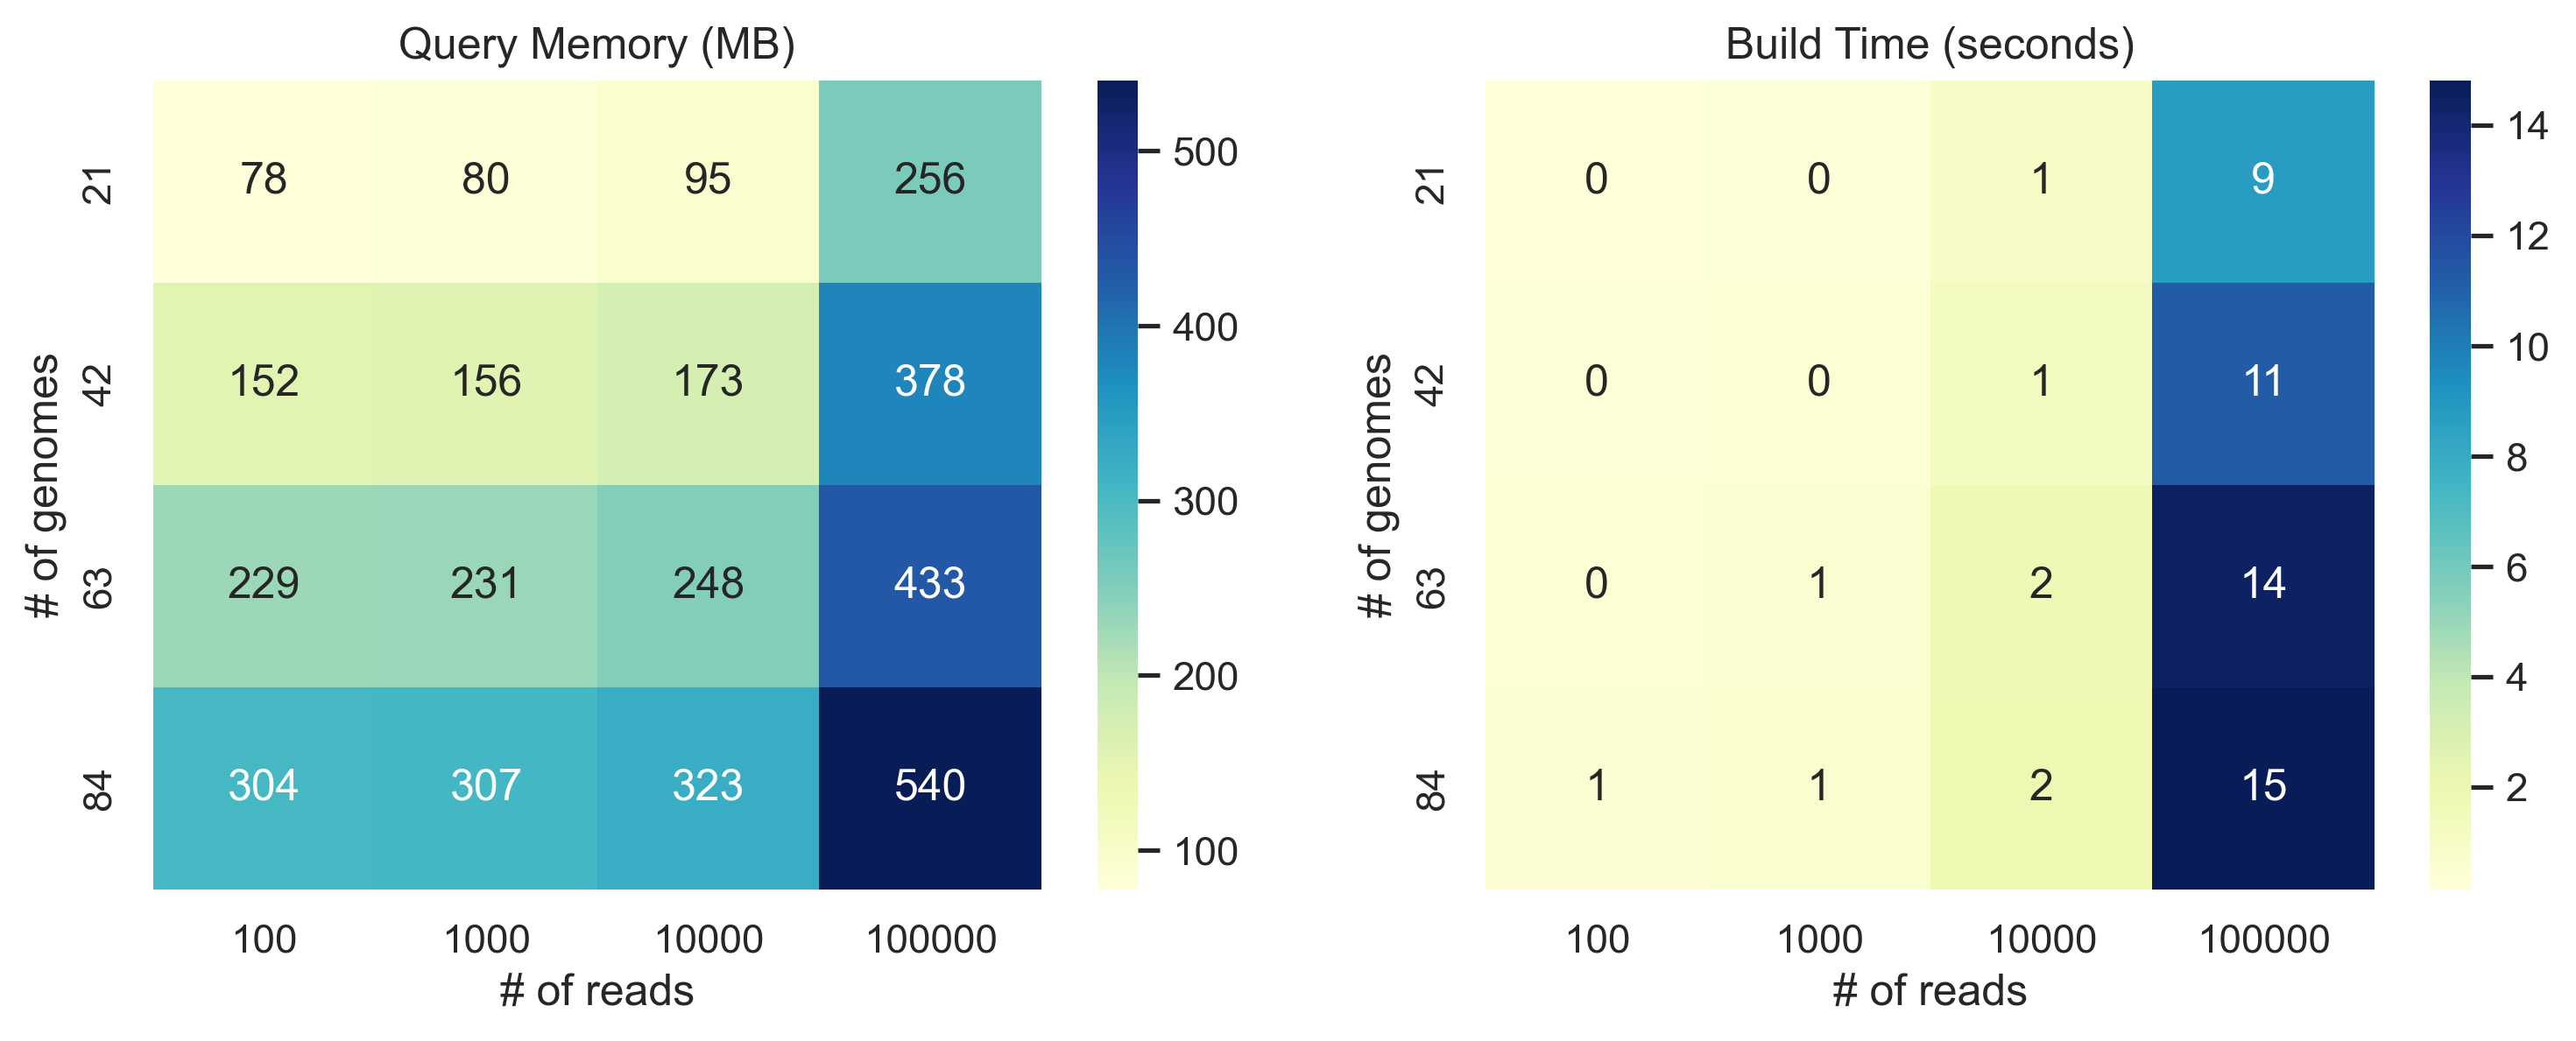

In [50]:
# Pivot the dataframe to create a matrix of query memory values
matrix1 = df.pivot(index='genome count', columns=' number of reads', values=f"Query Memory (MB)")
# Pivot the dataframe to create a matrix of query time values
matrix2 = df.pivot(index='genome count', columns=' number of reads', values=f"Query Time (seconds)")

# Set the figure size and create the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Create the first heatmap
sns.heatmap(matrix1, annot=True, fmt=".0f", cmap="YlGnBu", ax=axs[0])

# Set the title and axis labels for the first heatmap
axs[0].set_title(f"Query Memory (MB)")
axs[0].set_xlabel("# of reads")
axs[0].set_ylabel("# of genomes")

# Create the second heatmap
sns.heatmap(matrix2, annot=True, fmt=".0f", cmap="YlGnBu", ax=axs[1])

# Set the title and axis labels for the second heatmap
axs[1].set_title(f"{measure_type} Time (seconds)")
axs[1].set_xlabel("# of reads")
axs[1].set_ylabel("# of genomes")

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.2)

# Show the plot
plt.show()

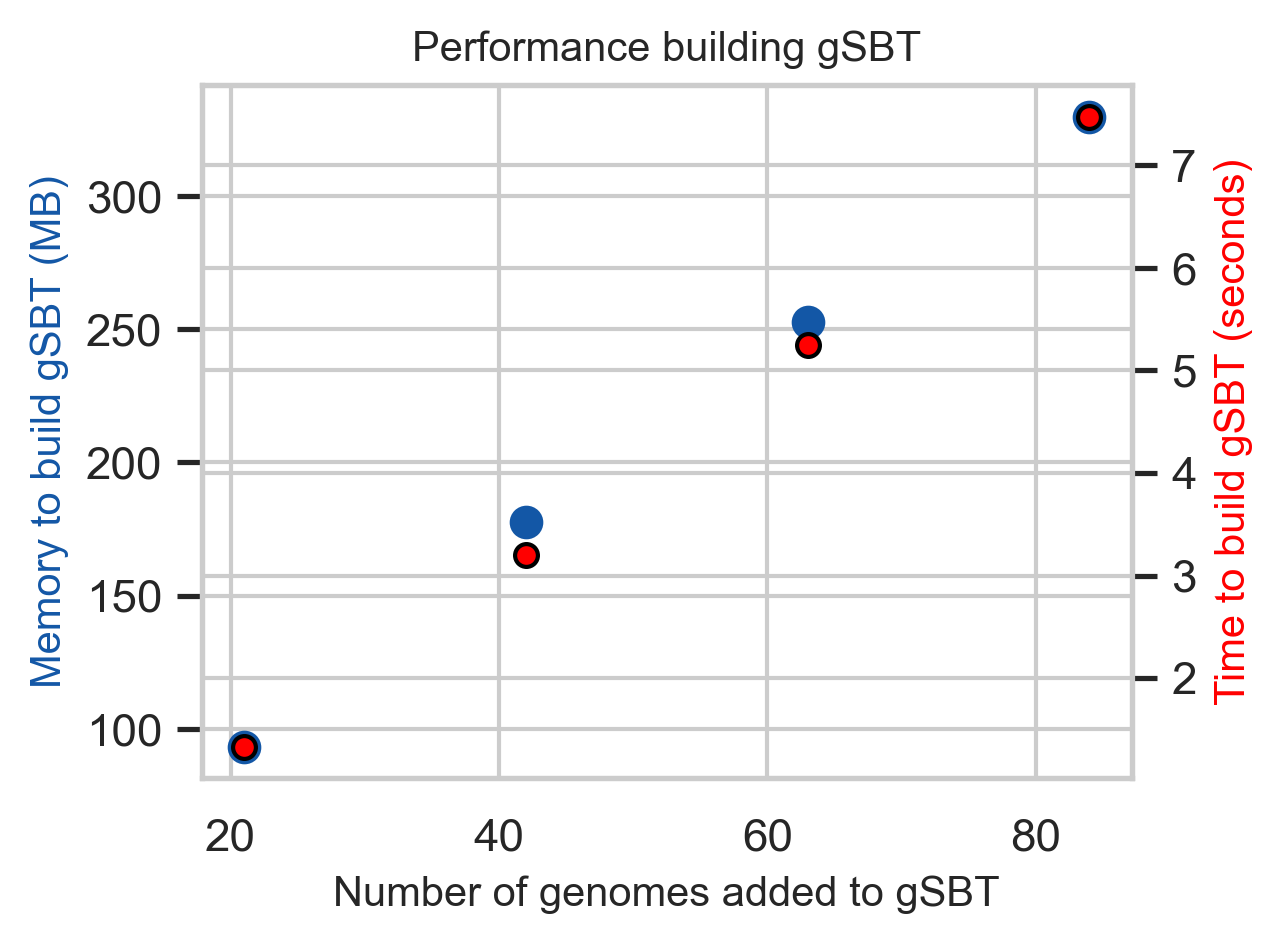

In [51]:
df_groupbyreads =  df.groupby(["genome count"], as_index=False).mean()


fig, ax1 = plt.subplots(figsize=(4, 3))
ax2 = ax1.twinx()

# add data
ax1.scatter(df_groupbyreads["genome count"], df_groupbyreads["Build Memory (MB)"], s=50, color='#1357a6', label="memory")
ax2.scatter(df_groupbyreads["genome count"], df_groupbyreads["Build Time (seconds)"], s=30, color='red', edgecolor="black", label="time")

# configure axis labels
plt.title('Performance building gSBT', size=10)
ax1.set_xlabel('Number of genomes added to gSBT', size=10)
ax1.set_ylabel('Memory to build gSBT (MB)', size=10, color='#1357a6')
ax2.set_ylabel('Time to build gSBT (seconds)', size=10, color='red')
plt.show()

---
---
## B - Genomes Benchmarking(Plotting)
---
---

### B.1 - parsing

In [13]:
genomes_csv = "results/res_genomes_wJSON.csv"

In [14]:
# open dataframe
df = csv2dataframe(genomes_csv)
df["Memory (MB)"] = df[" memory (bytes)"] / (10)**6
df["Time (minutes)"] = df[" time (ns)"] / (10**9 * 60)

### B.2 - plotting

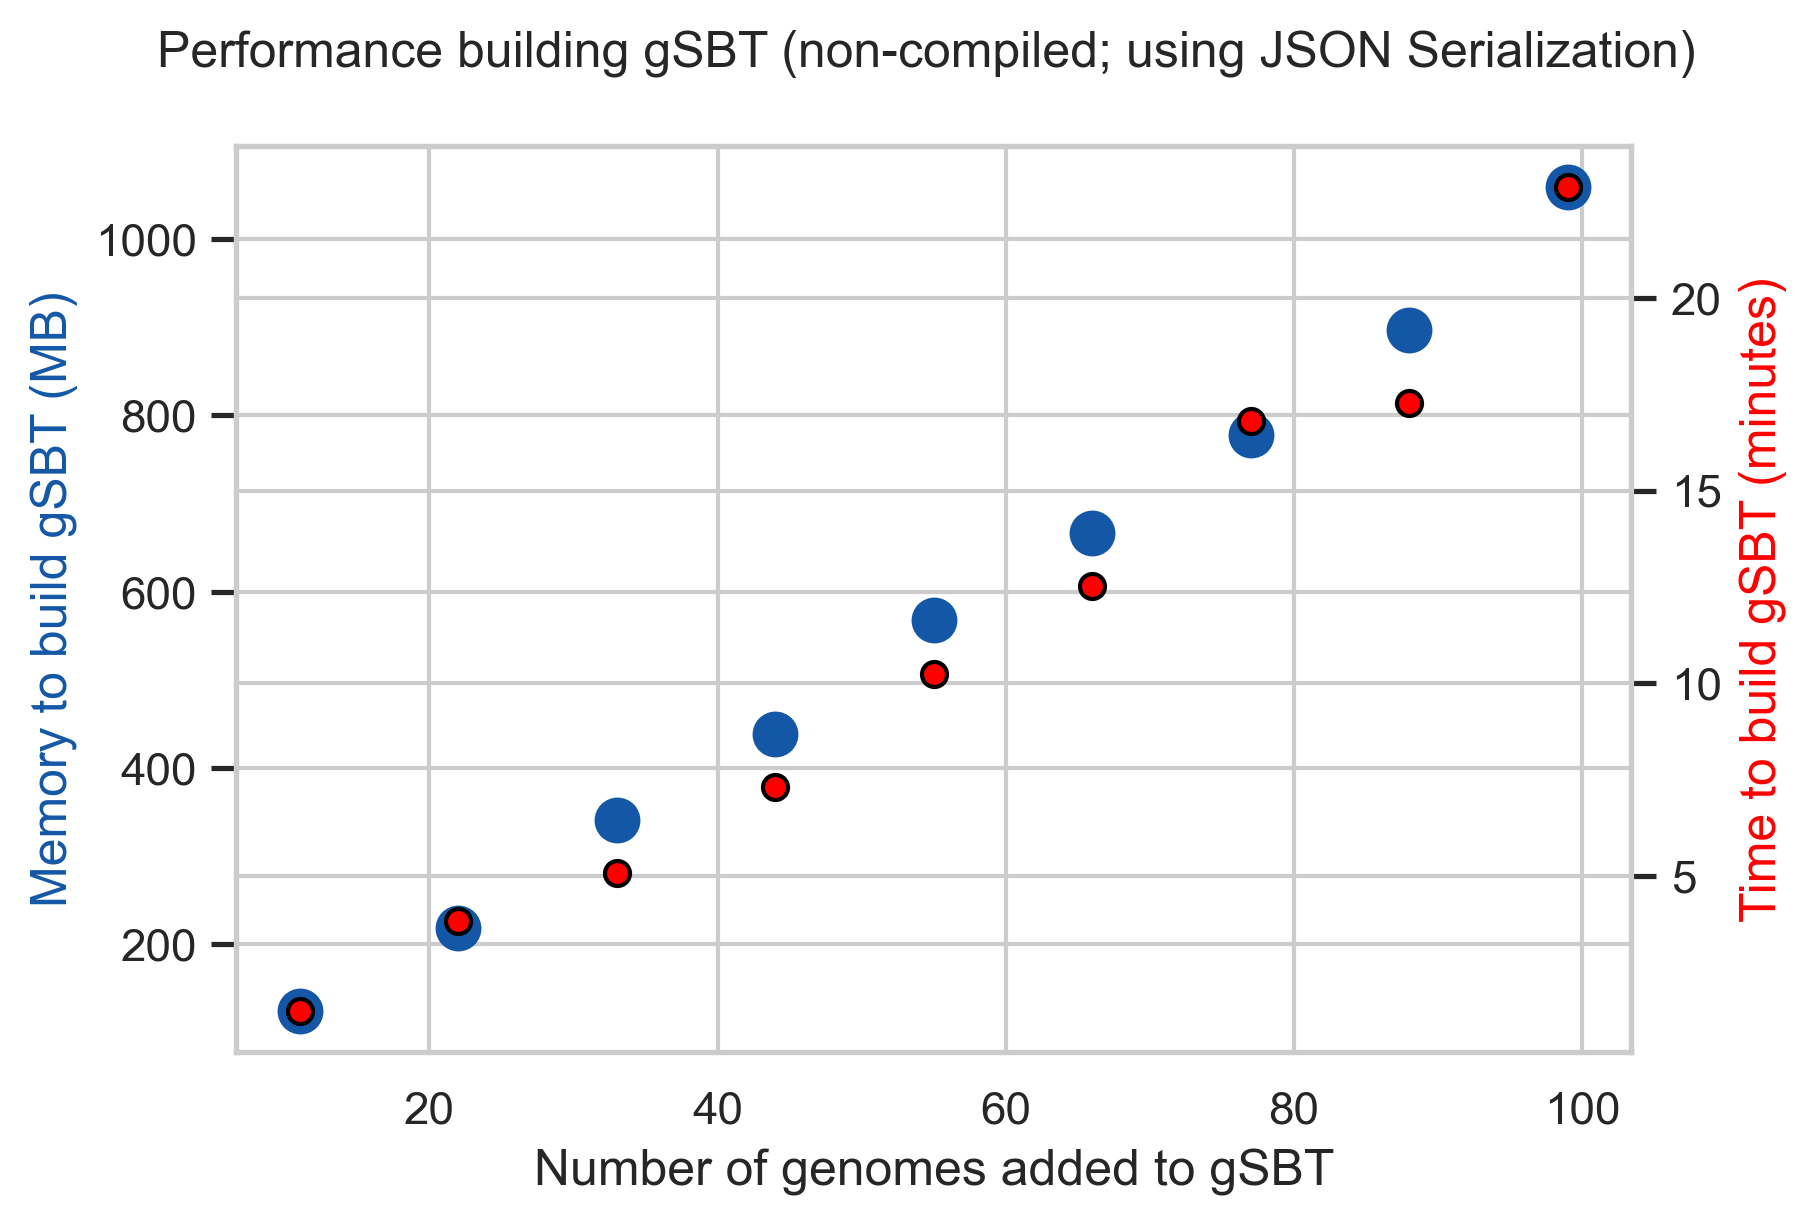

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# add data
ax1.scatter(df["genome count"], df["Memory (GB)"], s=100, color='#1357a6', label="memory")
ax2.scatter(df["genome count"], df["Time (minutes)"], color='red', edgecolor="black", label="time")

# configure axis labels
plt.title('Performance building gSBT (non-compiled; using JSON Serialization) \n')
ax1.set_xlabel('Number of genomes added to gSBT')
ax1.set_ylabel('Memory to build gSBT (MB)', color='#1357a6')
ax2.set_ylabel('Time to build gSBT (minutes)', color='red')
plt.show()

---
---
## C - Parameterization Benchmarking (Plotting)
---
---

### C.1 - parsing

In [434]:
pameterization_csv = "results2/res_parameterization.csv"

In [435]:
# open dataframe
df = csv2dataframe(pameterization_csv)
df["F1"] = 2* df[" precision"]*df[" recall"] / (df[" precision"]+df[" recall"])
df[" read count error"] = pandas.to_numeric(df[" avg read count error"].replace(" nan", np.nan))
#df =  df.groupby(["kmer size", " theta"], as_index=False).mean()

df2 =  df.groupby(["kmer size", " number of genomes"], as_index=False).mean()

df3 =  df.groupby(["kmer size", " error rate"], as_index=False).mean()

df4 =  df.groupby([" theta", " error rate"], as_index=False).mean()

df =  df.groupby(["kmer size", " theta"], as_index=False).mean()


### C.2 - plotting

<AxesSubplot:xlabel='kmer size', ylabel=' number of genomes'>

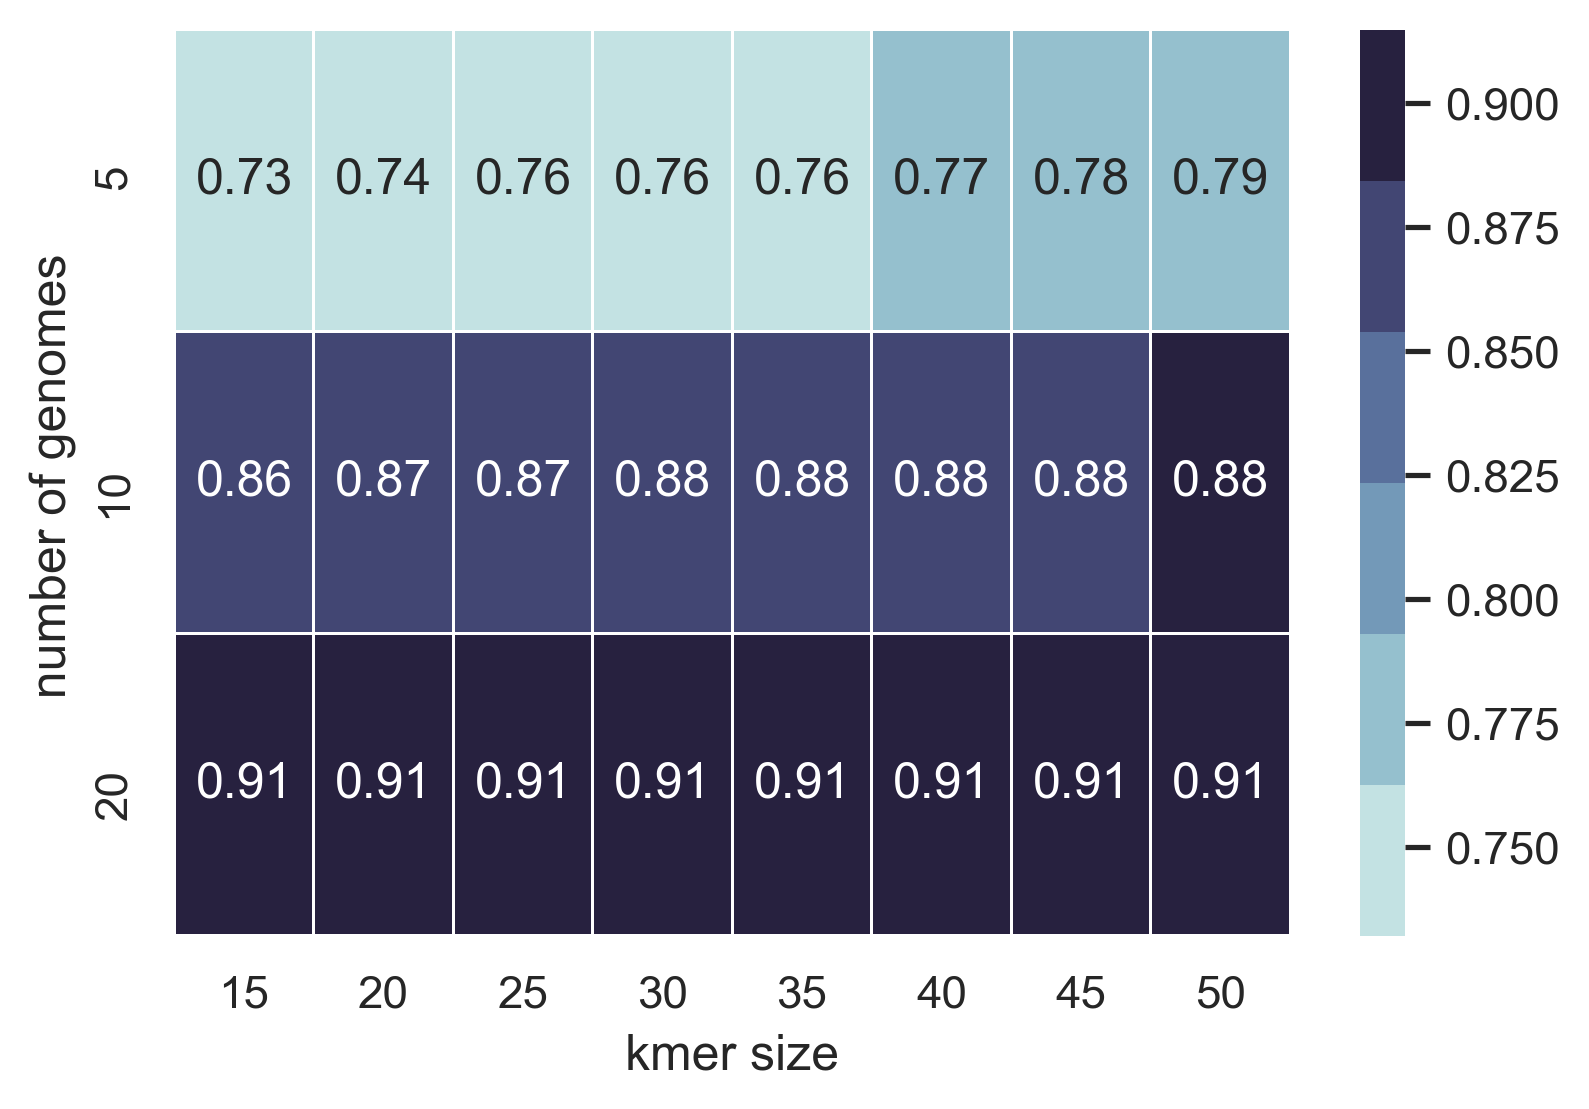

In [436]:
 sns.heatmap(data=df2.pivot(" number of genomes", "kmer size", "F1"), annot=True, linewidth=.5, cmap=sns.color_palette("ch:start=.2,rot=-.3"))

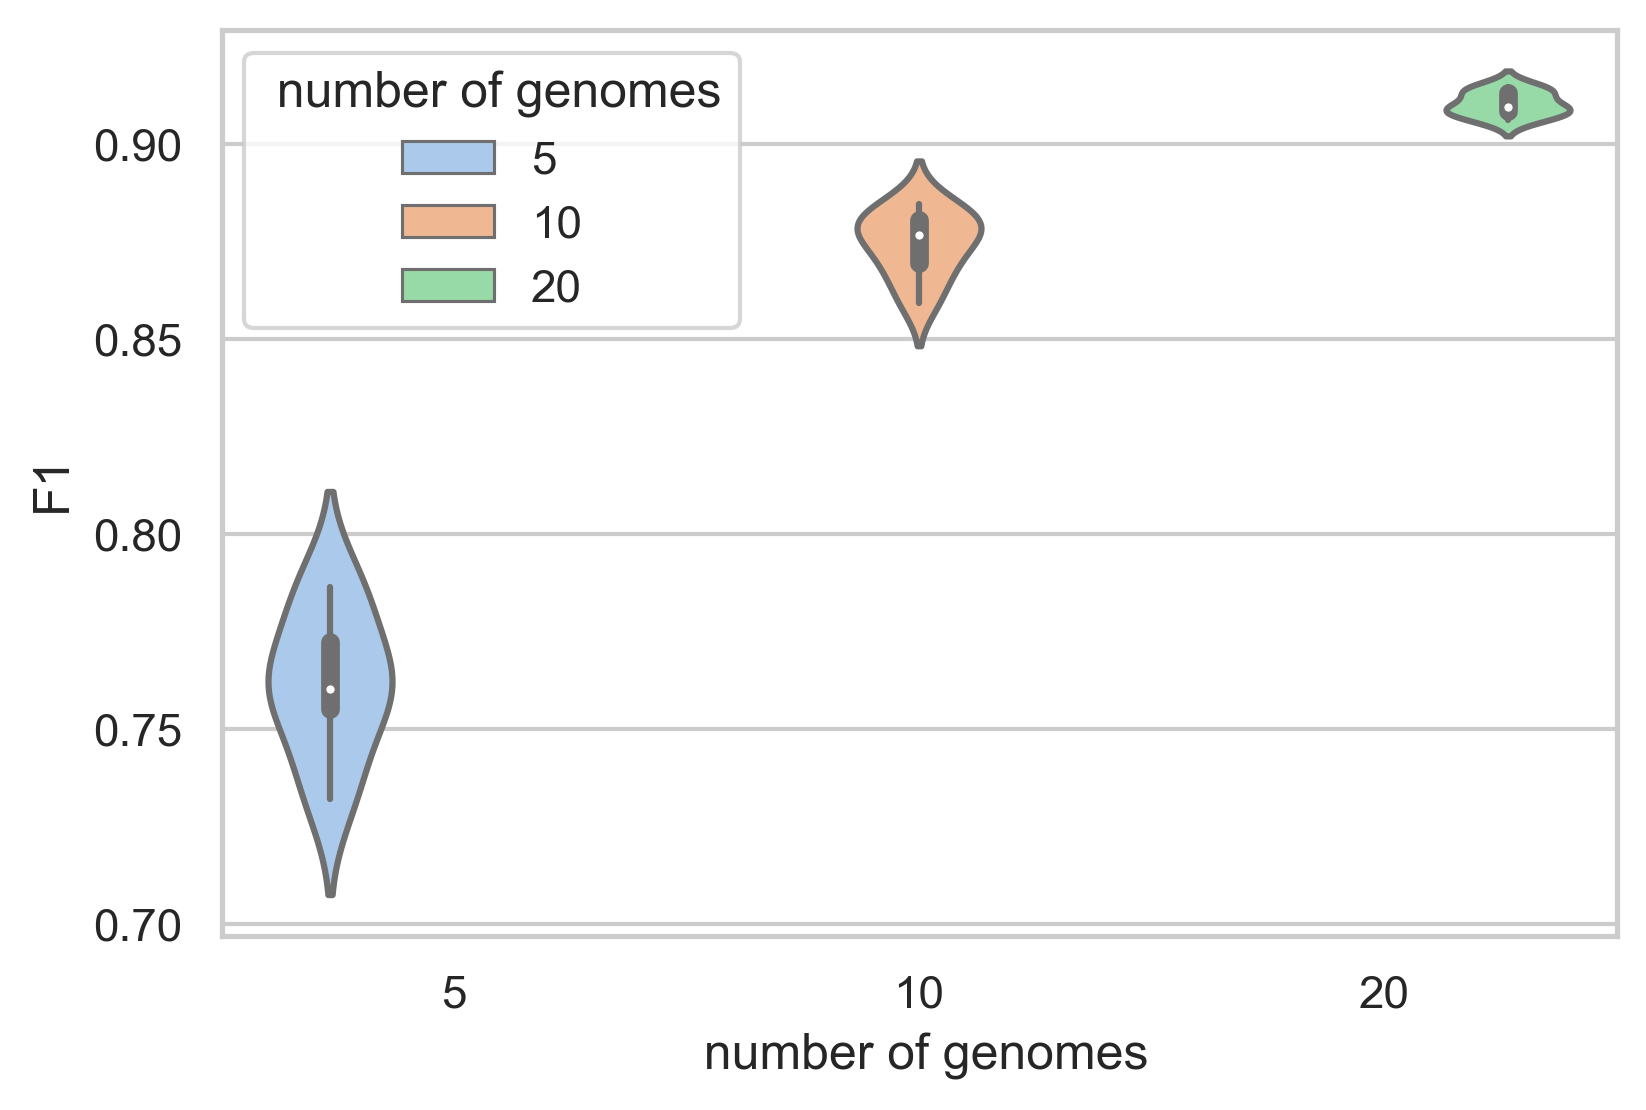

In [437]:
ax = sns.violinplot(data=df2, x=" number of genomes", y="F1", hue=" number of genomes")

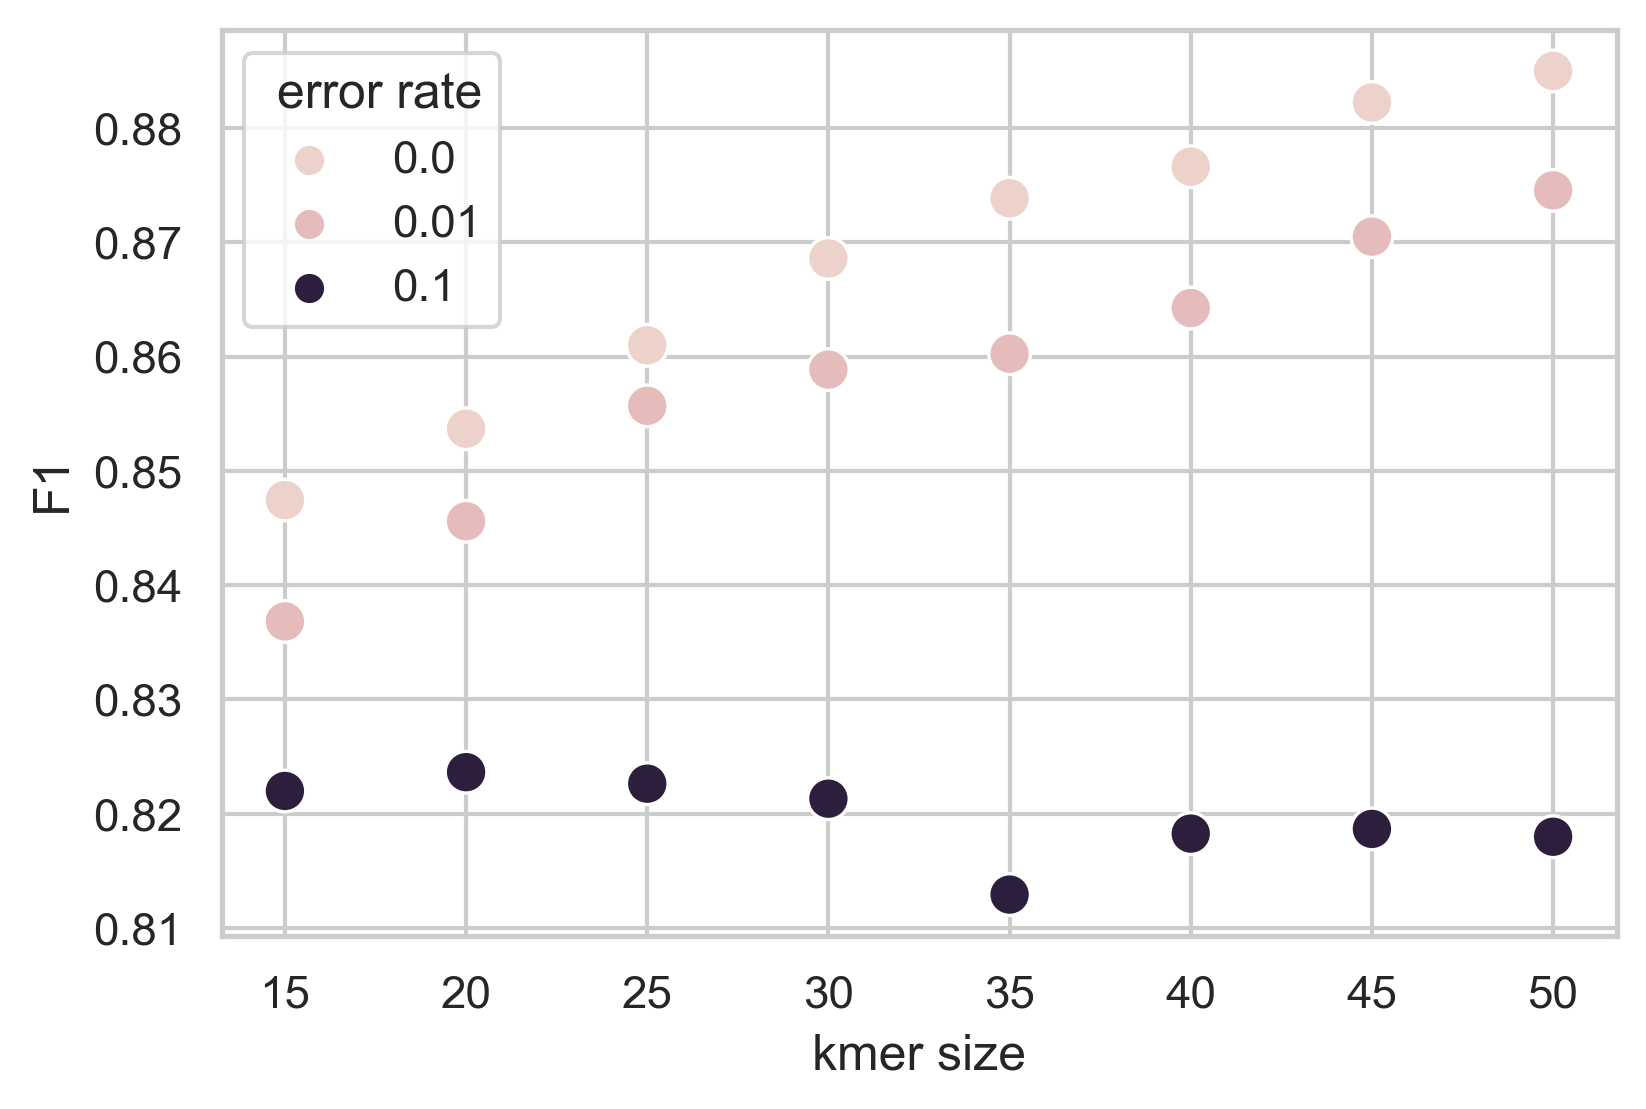

In [438]:
ax = sns.scatterplot(data=df3, x="kmer size", y="F1", hue=" error rate", s=100)

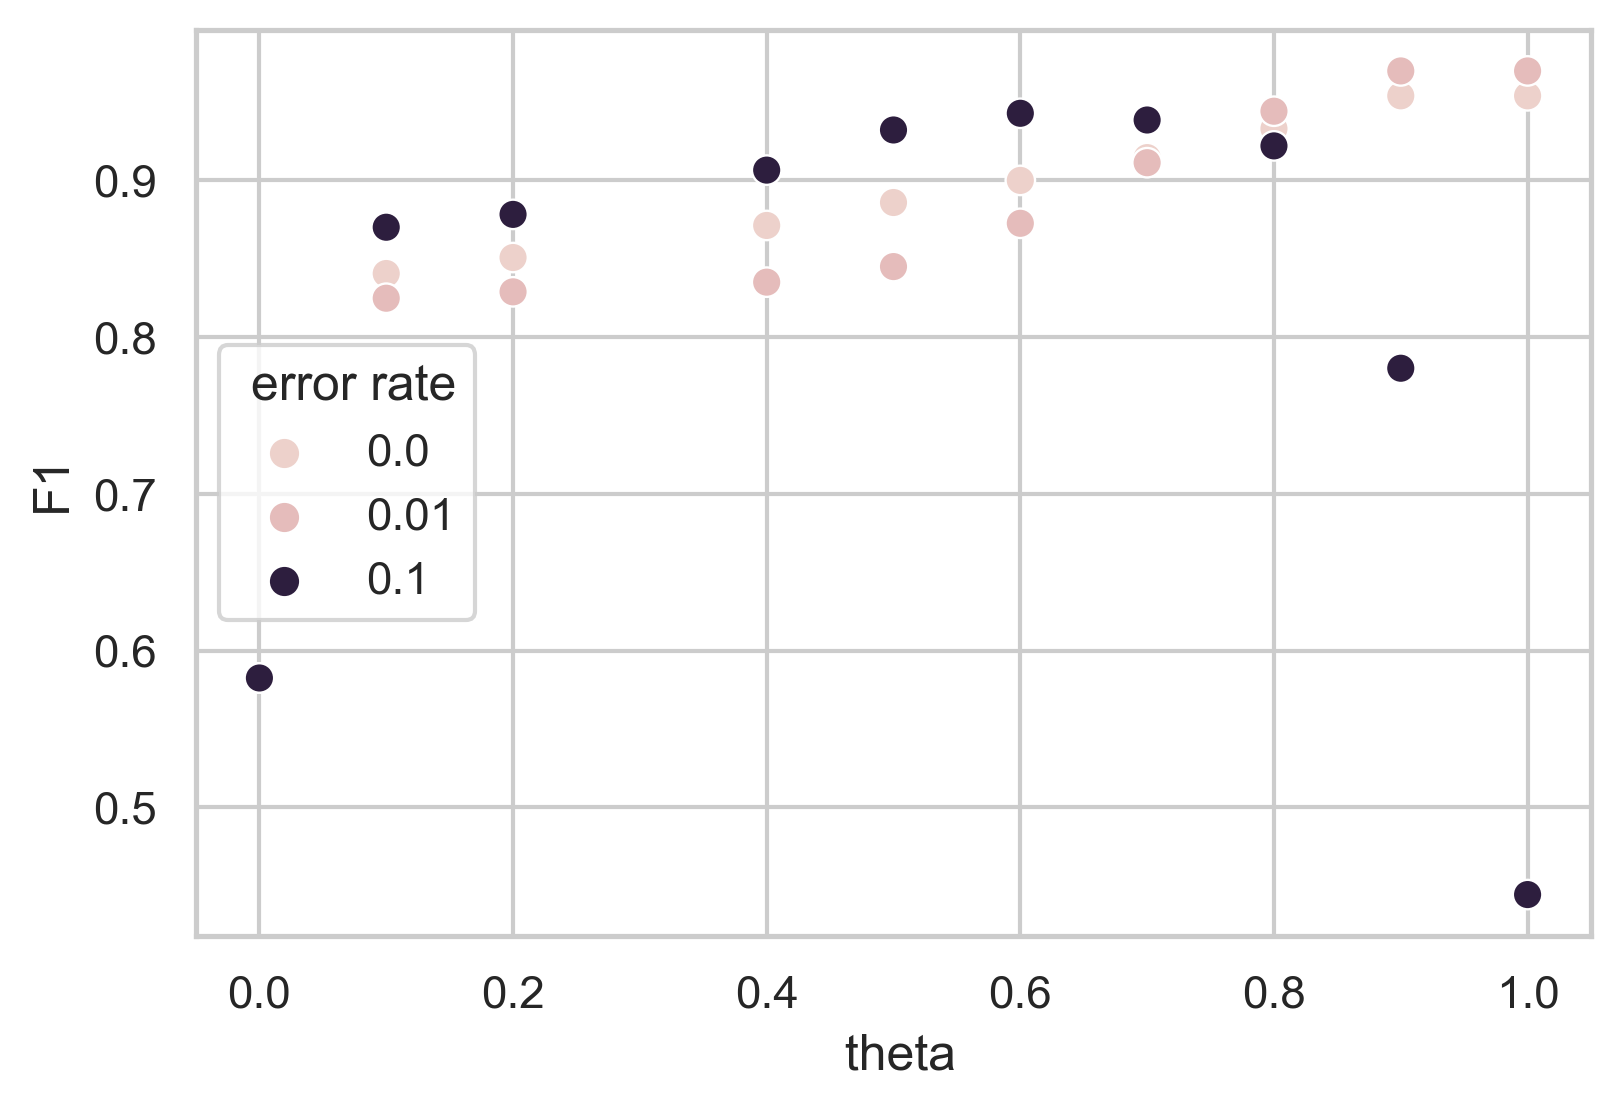

In [439]:
ax = sns.scatterplot(data=df4, x=" theta", y="F1", hue=" error rate", s=50)

# ax = sns.heatmap(data=df.pivot("kmer size", " theta", " recall"), annot=True, linewidth=.5, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
, vmin=0, vmax=1.0)
ax.set_title("Parameterization \n")

Text(0.5, 1.0, 'F1 \n')

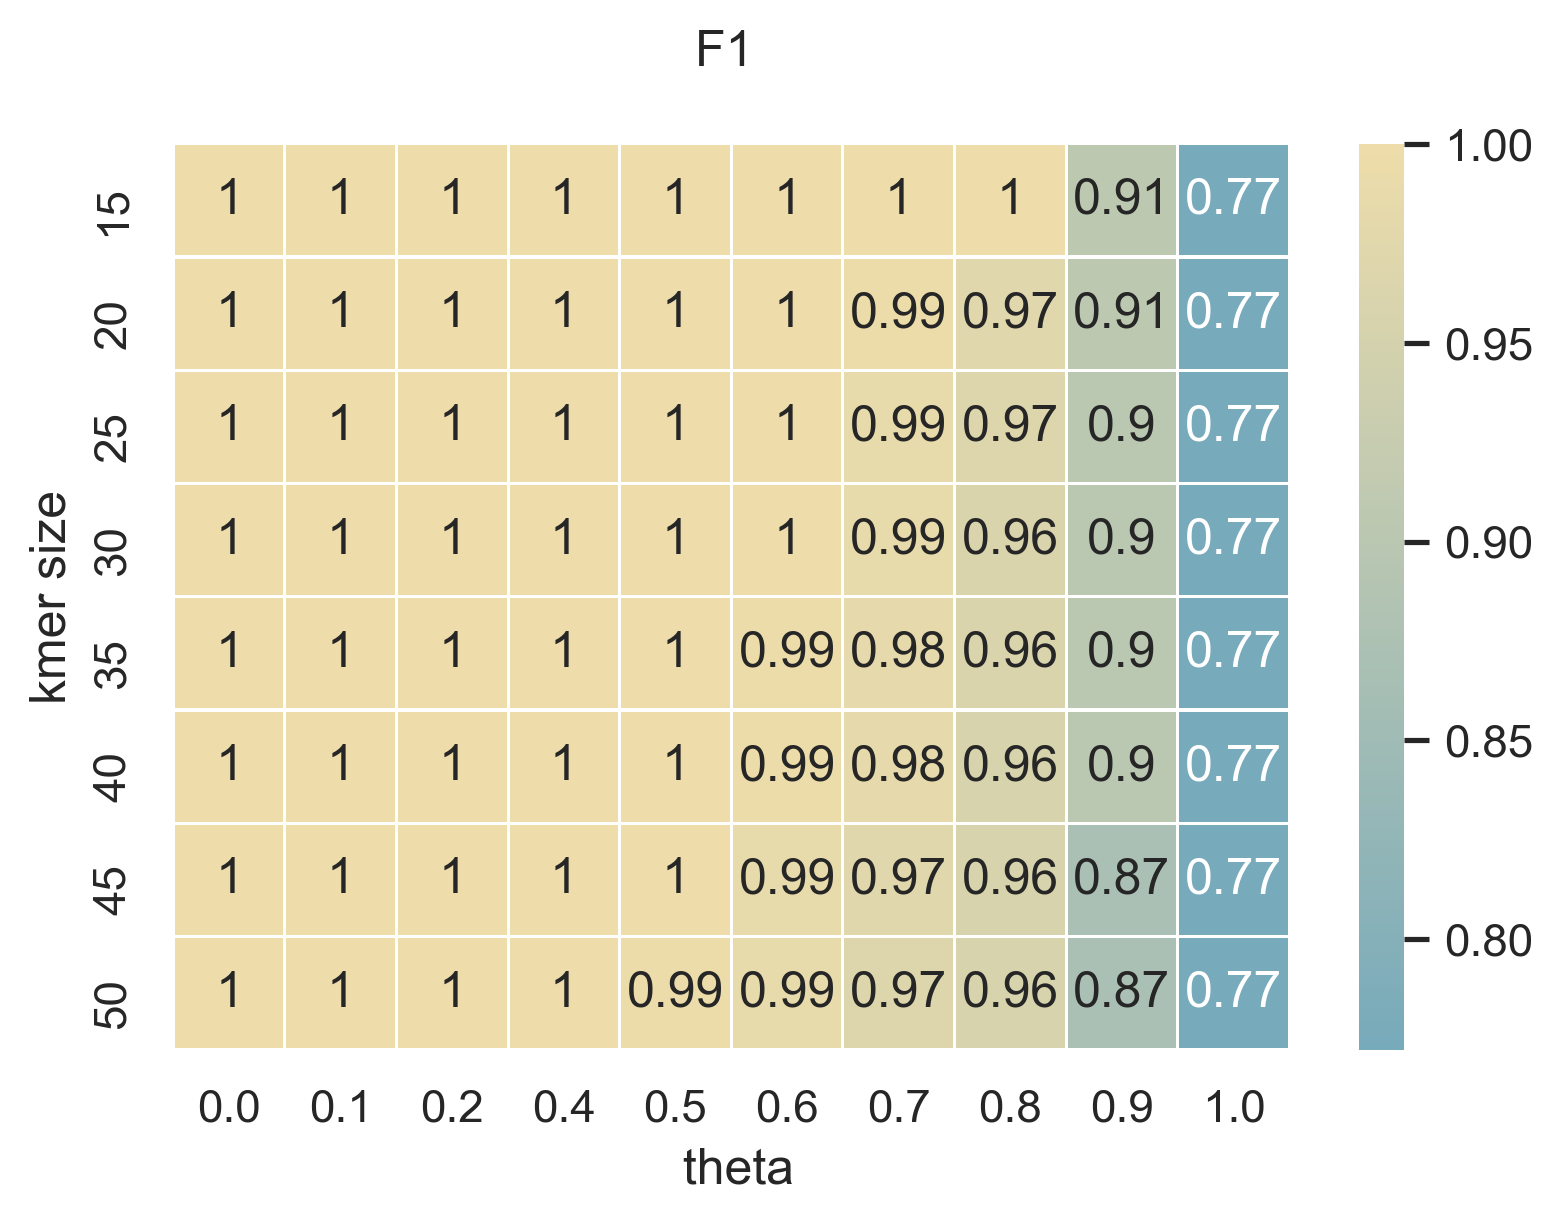

In [440]:
ax = sns.heatmap(data=df.pivot("kmer size", " theta", " recall"), annot=True, linewidth=.5, cmap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True))
ax.set_title("F1 \n")

Text(0.5, 1.0, 'Read Count Error \n')

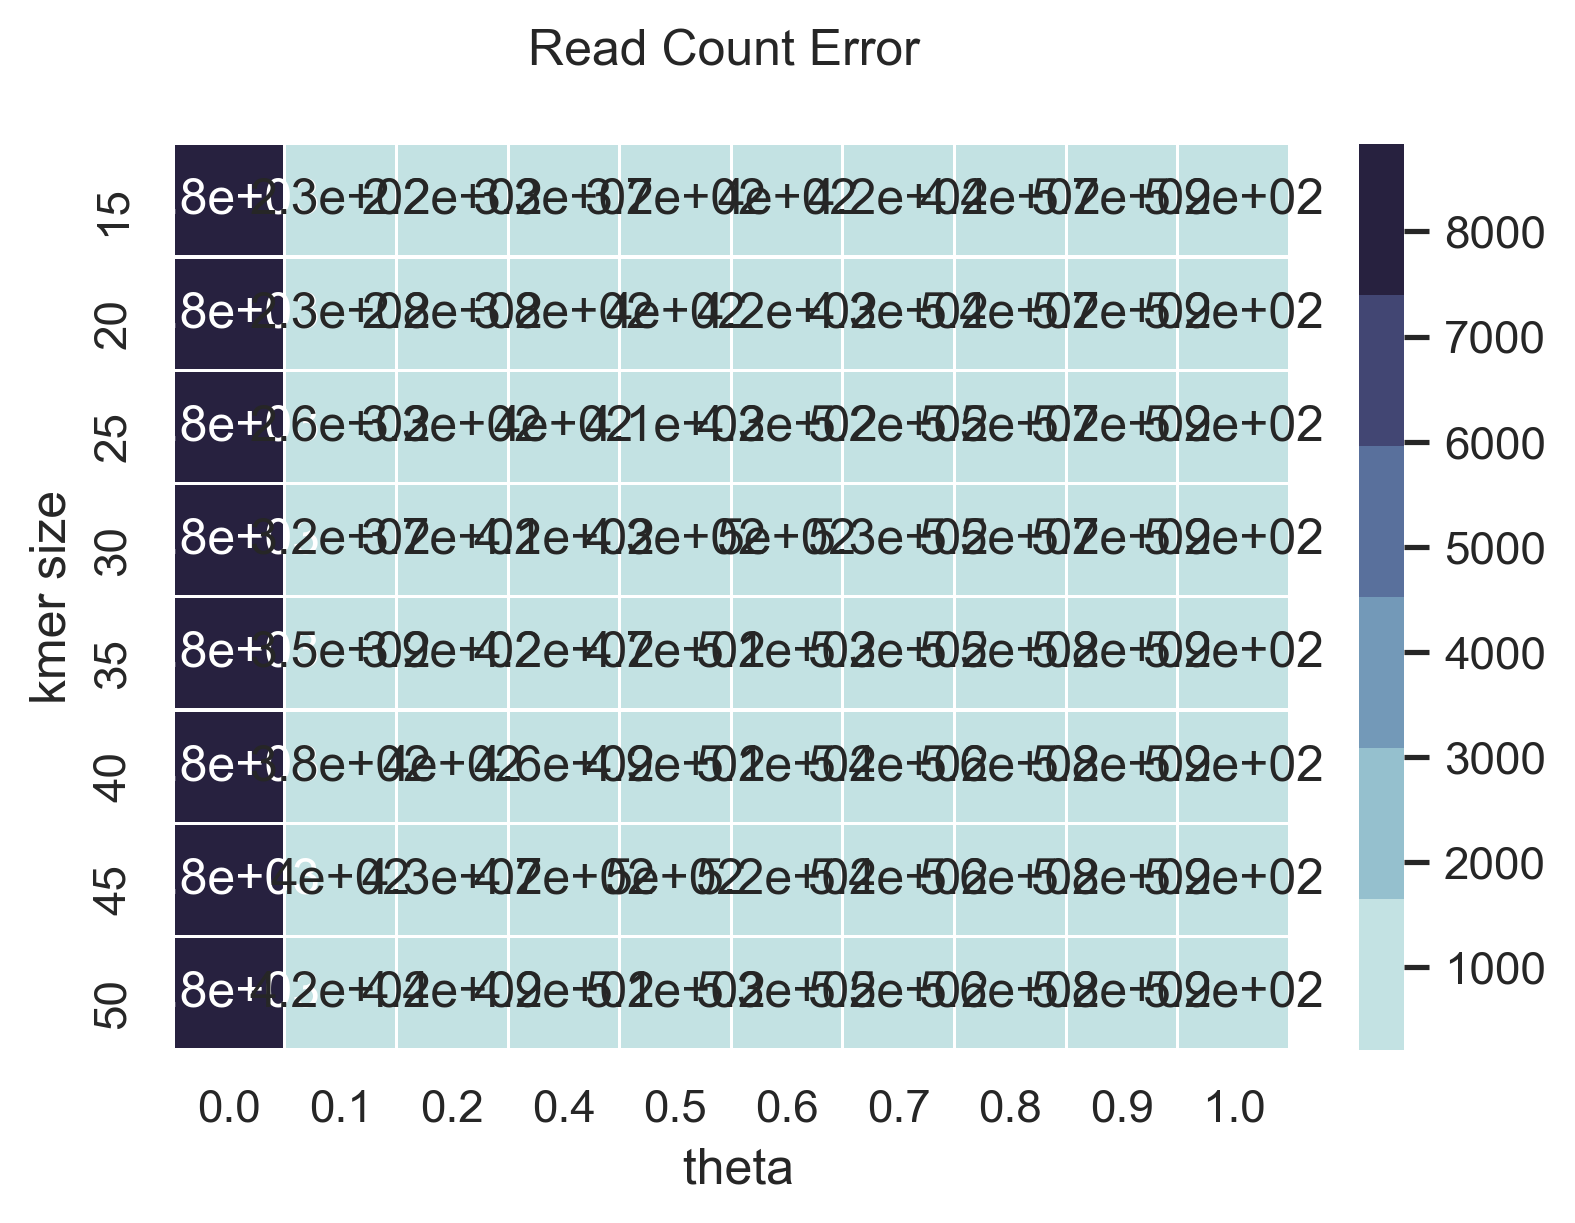

In [441]:
ax = sns.heatmap(data=df.pivot("kmer size", " theta", " read count error"), annot=True, linewidth=.5, cmap=sns.color_palette("ch:start=.2,rot=-.3"))
ax.set_title("Read Count Error \n")

---
---
## D - Relative Performance Benchmarking (Plotting)
---
---

### D.1 - parsing

In [426]:
relative_performance_csv = "results/res_relative_performance.csv"

In [427]:
# open dataframe
df = csv2dataframe(relative_performance_csv)
df["F1"] = 2* df[" precision"]*df[" recall"] / (df[" precision"]+df[" recall"])
df["Mean read count error"] = pandas.to_numeric(df[" read count error"].replace(" nan", np.nan))
df["Memory (MB)"] = df[" memory"] / (10)**6
df["Time (minutes)"] = df[" time"] / (10**9 * 60)

### D.2 - plotting

<AxesSubplot:xlabel='tool name', ylabel=' recall'>

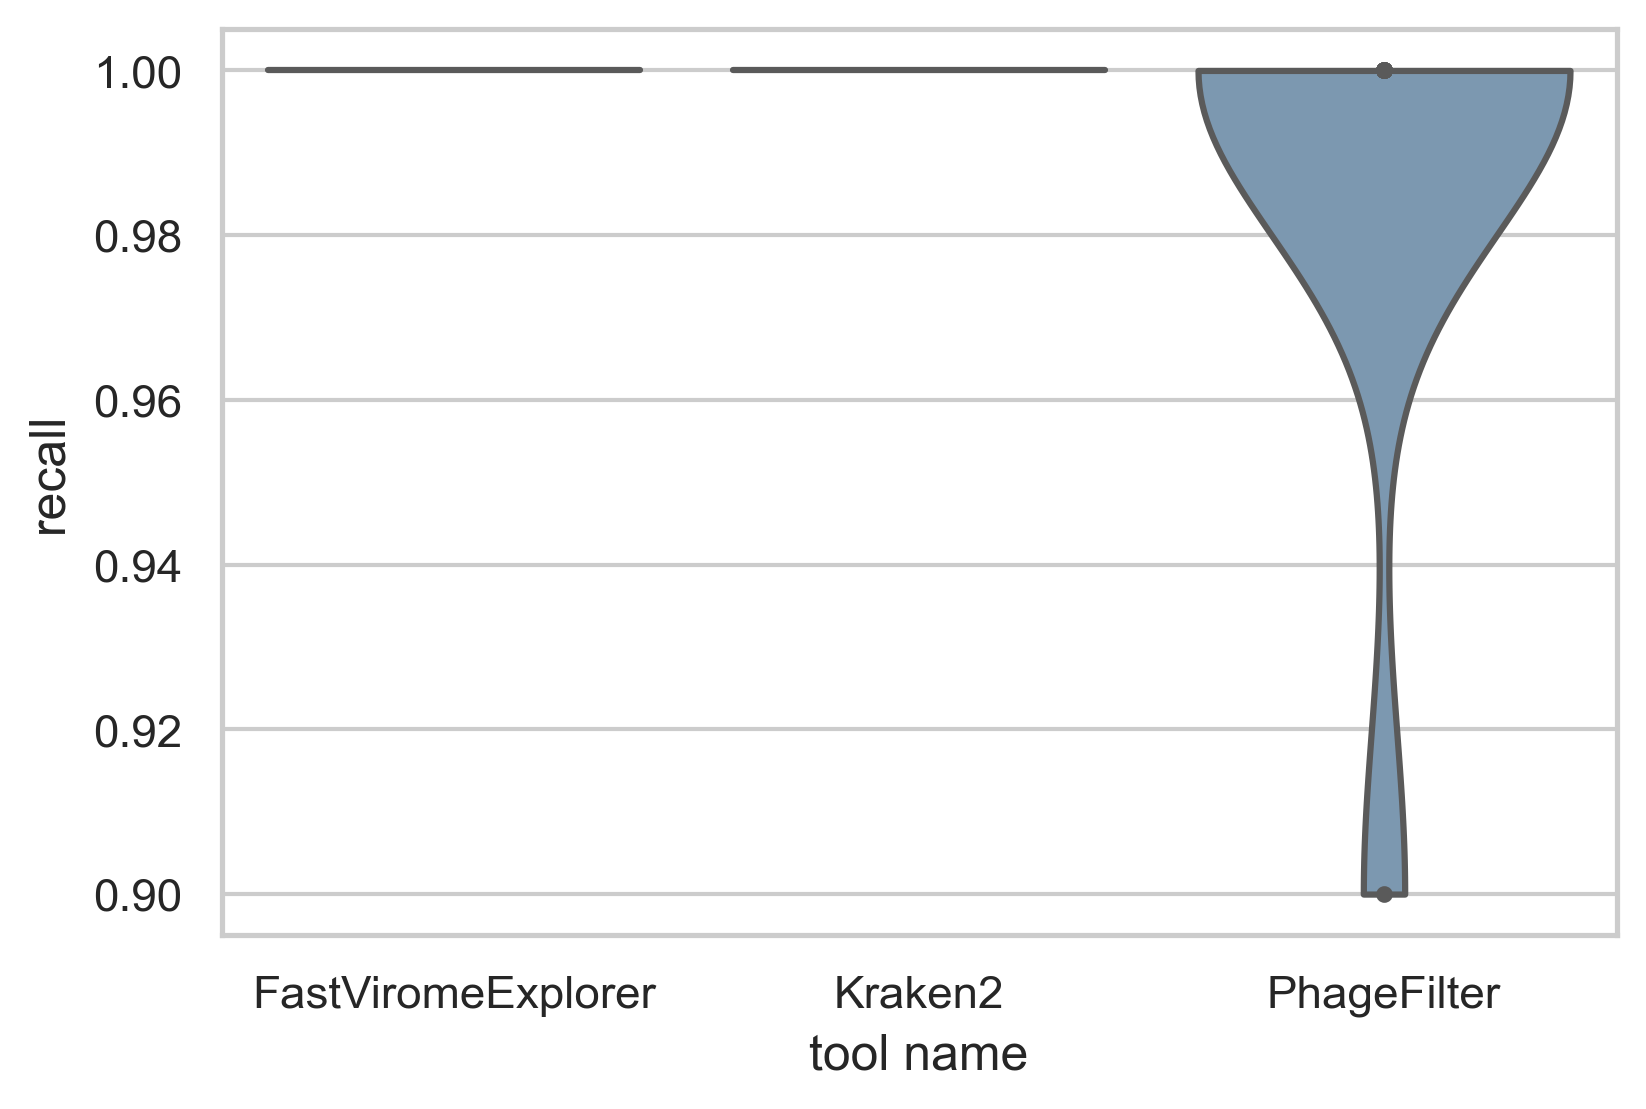

In [428]:
sns.violinplot(data=df, x="tool name", y=" recall", cut=0, inner="point", palette=sns.color_palette("ch:start=.2,rot=-.3"))

<AxesSubplot:xlabel='tool name', ylabel=' precision'>

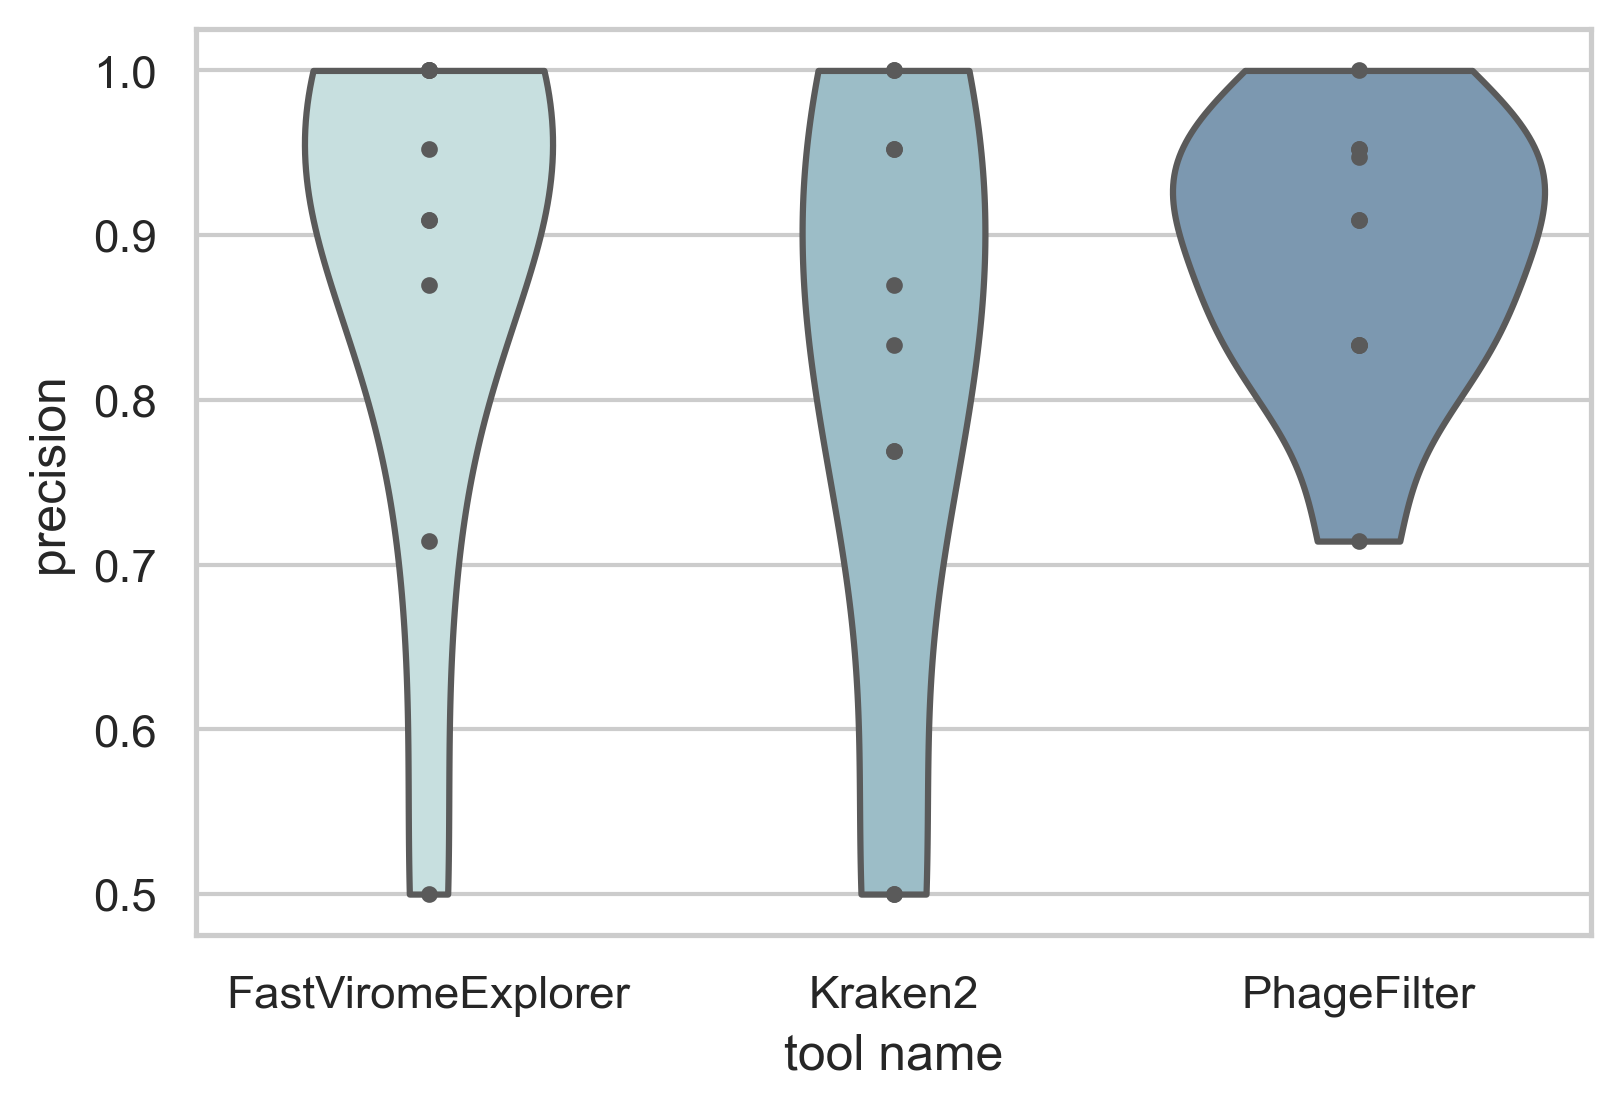

In [429]:
sns.violinplot(data=df, x="tool name", y=" precision", cut=0, inner="point", palette=sns.color_palette("ch:start=.2,rot=-.3"))

<AxesSubplot:xlabel='tool name', ylabel='F1'>

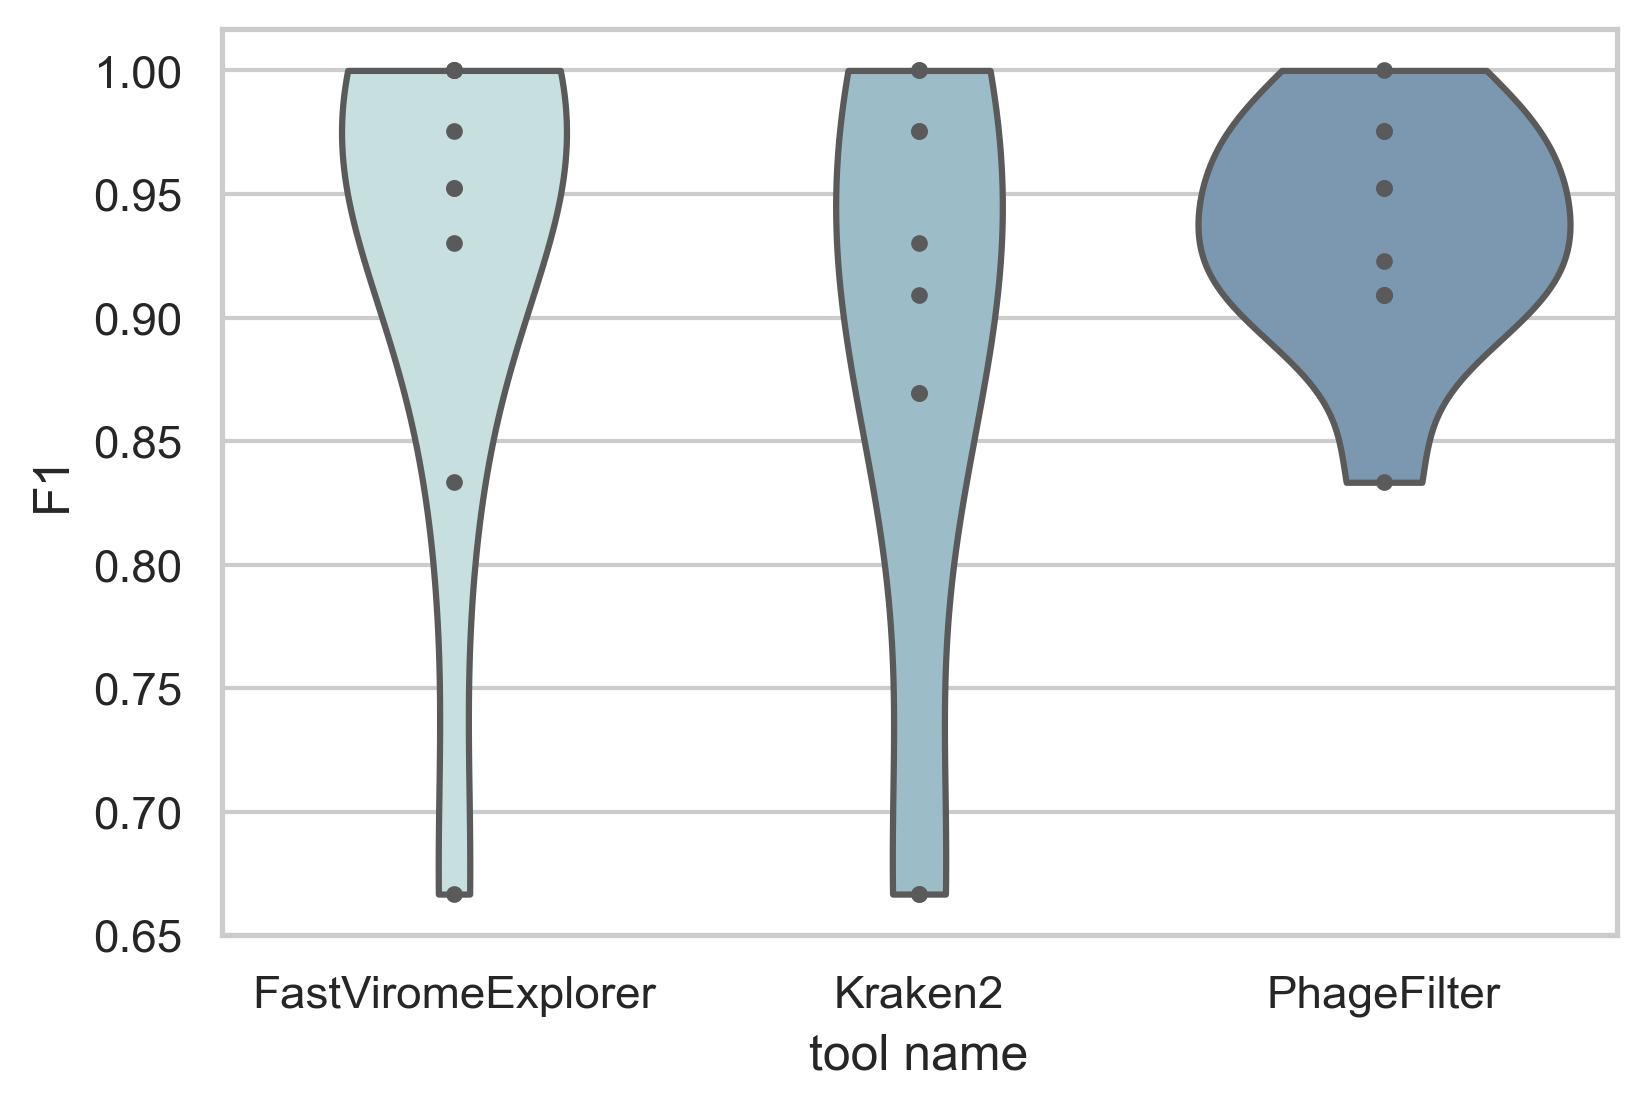

In [430]:
sns.violinplot(data=df, x="tool name", y="F1", cut=0, inner="point", palette=sns.color_palette("ch:start=.2,rot=-.3"))

<AxesSubplot:xlabel='tool name', ylabel='Mean read count error'>

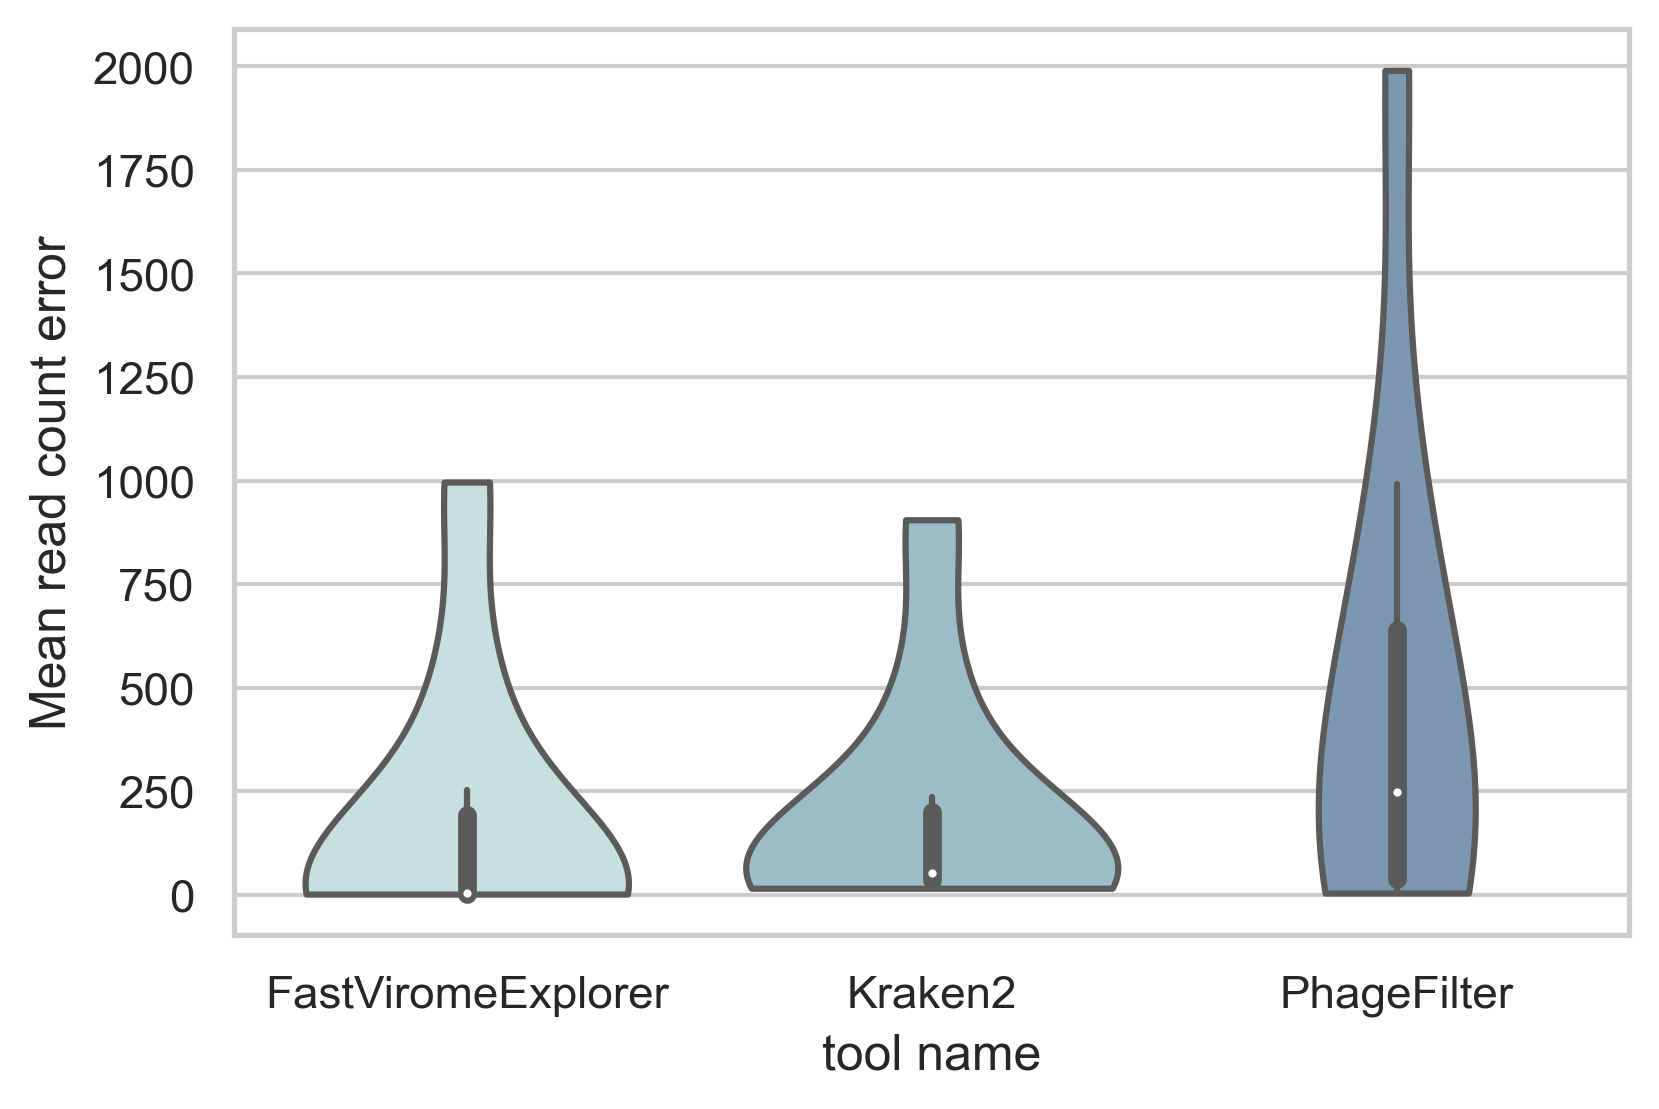

In [431]:
sns.violinplot(data=df, x="tool name", y="Mean read count error", cut=0, palette=sns.color_palette("ch:start=.2,rot=-.3"))

<AxesSubplot:xlabel='tool name', ylabel='Time (minutes)'>

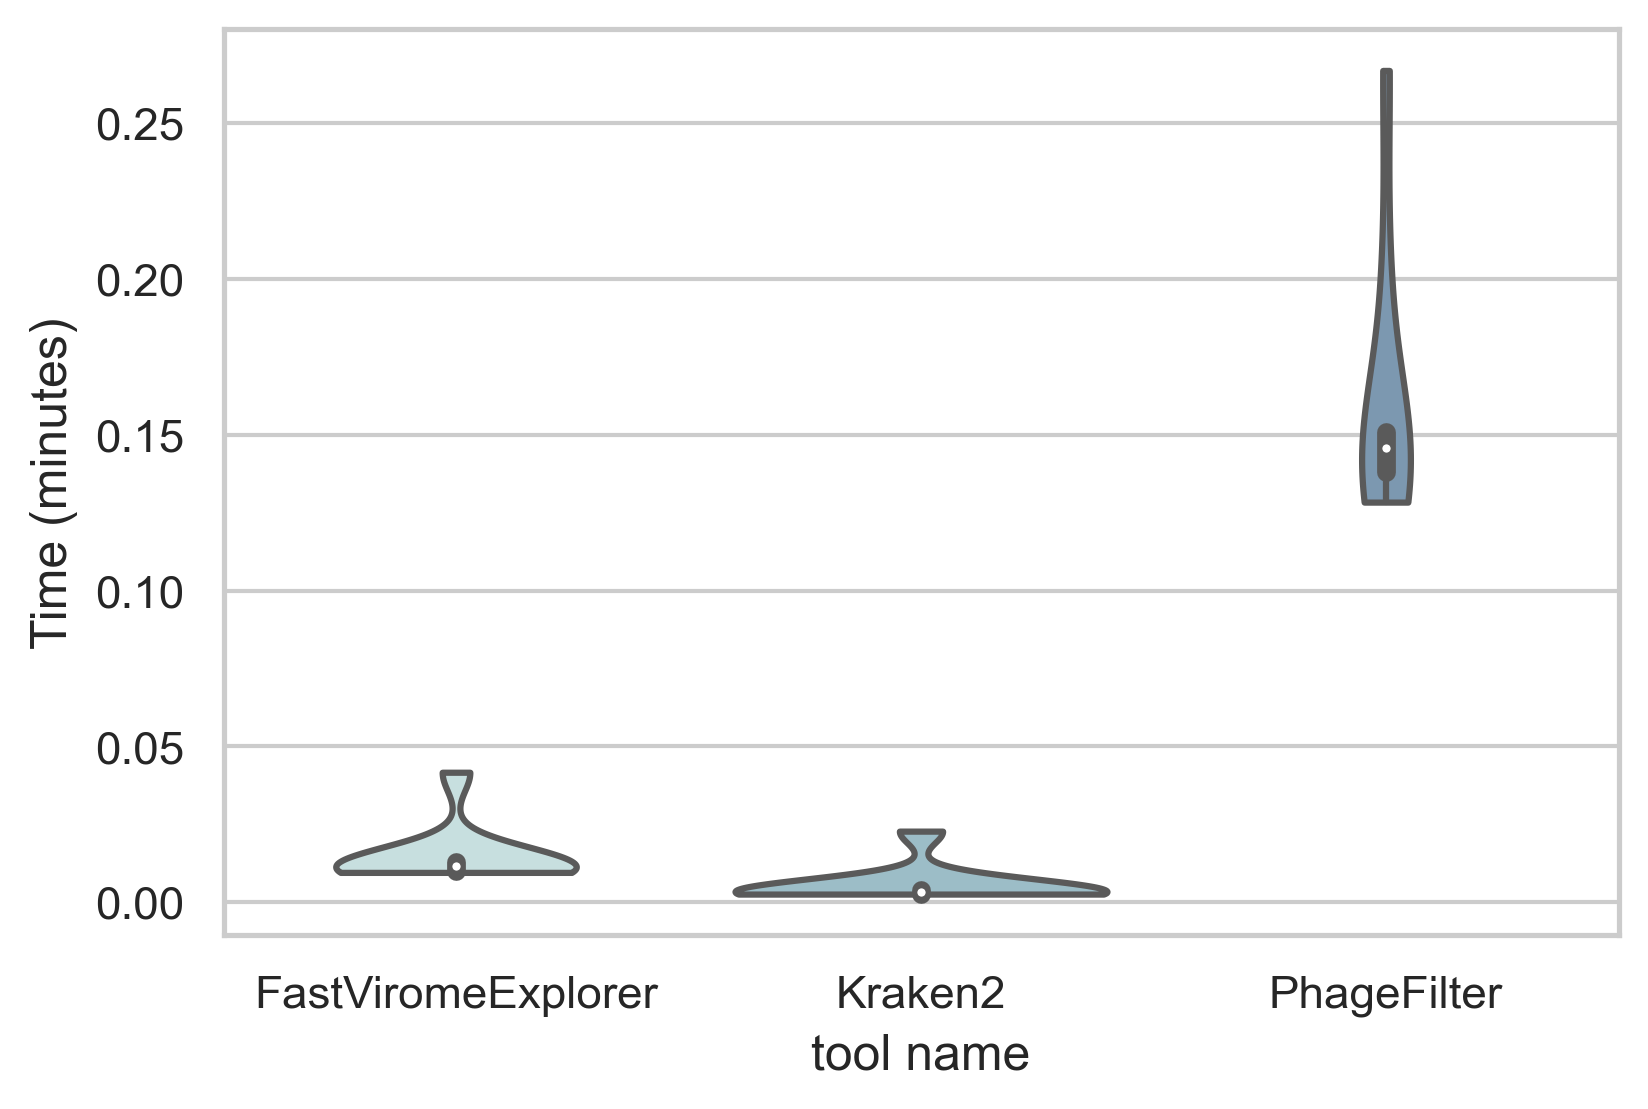

In [432]:
sns.violinplot(data=df, x="tool name", y="Time (minutes)", cut=0, palette=sns.color_palette("ch:start=.2,rot=-.3"))

<AxesSubplot:xlabel='tool name', ylabel='Memory (GB)'>

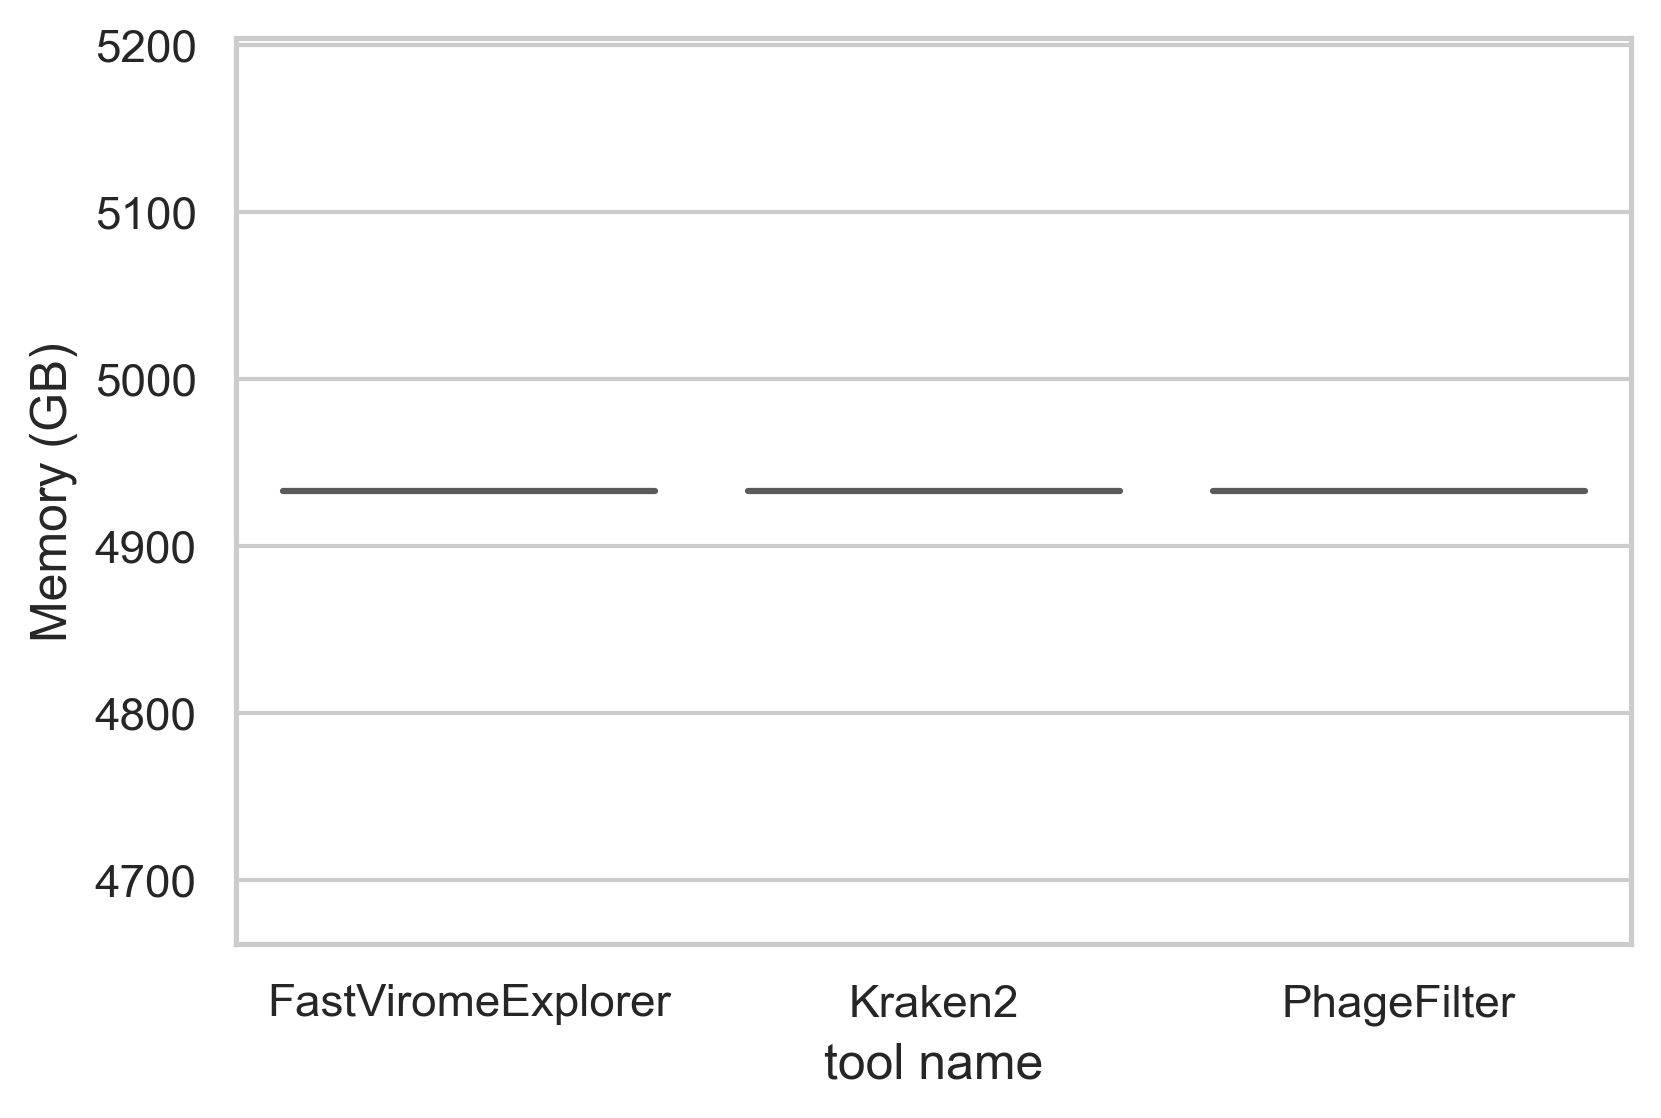

In [433]:
sns.violinplot(data=df, x="tool name", y="Memory (GB)", cut=0, palette=sns.color_palette("ch:start=.2,rot=-.3"))